In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-chains-dataset/Coffee.csv


# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/coffee-chains-dataset/Coffee.csv')

In [4]:
df.head(10)

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,719,40909,Central,Major Market,Amaretto,Beans,Coffee,Colorado,Regular,90,130,100,220,89,777,130,24,94,219,36
1,970,40909,Central,Major Market,Colombian,Beans,Coffee,Colorado,Regular,80,110,80,190,83,623,107,27,68,190,39
2,970,40909,Central,Major Market,Decaf Irish Cream,Beans,Coffee,Colorado,Decaf,100,140,110,240,95,821,139,26,101,234,38
3,303,40909,Central,Major Market,Green Tea,Leaves,Tea,Colorado,Regular,30,50,30,80,44,623,56,14,30,100,26
4,303,40909,Central,Major Market,Caffe Mocha,Beans,Espresso,Colorado,Regular,60,90,70,150,54,456,80,15,54,134,26
5,720,40909,Central,Major Market,Decaf Espresso,Beans,Espresso,Colorado,Decaf,80,130,80,210,72,558,108,23,53,180,55
6,970,40909,Central,Major Market,Chamomile,Leaves,Herbal Tea,Colorado,Decaf,140,160,110,300,170,1091,171,47,99,341,72
7,719,40909,Central,Major Market,Lemon,Leaves,Herbal Tea,Colorado,Decaf,50,80,20,130,63,435,87,57,0,150,87
8,970,40909,Central,Major Market,Mint,Leaves,Herbal Tea,Colorado,Decaf,50,70,40,120,60,336,80,19,33,140,47
9,719,40909,Central,Major Market,Darjeeling,Leaves,Tea,Colorado,Regular,40,70,20,110,58,338,72,22,17,130,55


In [5]:
df.sample(5)

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
4106,816,41609,Central,Small Market,Decaf Espresso,Beans,Espresso,Missouri,Decaf,30,60,50,90,31,844,46,8,40,82,19
2250,435,41275,West,Small Market,Green Tea,Leaves,Tea,Utah,Regular,10,30,10,40,29,169,36,11,-14,73,47
2054,405,41244,South,Small Market,Colombian,Beans,Coffee,Oklahoma,Regular,90,130,100,220,81,551,104,26,66,185,38
4054,541,41579,West,Small Market,Lemon,Leaves,Herbal Tea,Oregon,Decaf,80,100,70,180,88,561,112,29,104,213,42
1389,775,41122,West,Small Market,Earl Grey,Leaves,Tea,Nevada,Regular,170,190,130,360,266,1797,266,74,167,532,99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area Code       4248 non-null   int64 
 1   Date            4248 non-null   int64 
 2   Market          4248 non-null   object
 3   Market Size     4248 non-null   object
 4   Product         4248 non-null   object
 5   Product Line    4248 non-null   object
 6   Product Type    4248 non-null   object
 7   State           4248 non-null   object
 8   Type            4248 non-null   object
 9   Budget COGS     4248 non-null   int64 
 10  Budget Margin   4248 non-null   int64 
 11  Budget Profit   4248 non-null   int64 
 12  Budget Sales    4248 non-null   int64 
 13  COGS            4248 non-null   int64 
 14  Inventory       4248 non-null   int64 
 15  Margin          4248 non-null   int64 
 16  Marketing       4248 non-null   int64 
 17  Profit          4248 non-null   int64 
 18  Sales   

In [7]:
df.columns

Index(['Area Code', 'Date', 'Market', 'Market Size', 'Product', 'Product Line',
       'Product Type', 'State', 'Type', 'Budget COGS', 'Budget Margin',
       'Budget Profit', 'Budget Sales', 'COGS', 'Inventory', 'Margin',
       'Marketing', 'Profit', 'Sales', 'Total Expenses'],
      dtype='object')

In [8]:
df.describe()

,Area Code,Date,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,41258.916667,74.830508,100.819209,60.913371,175.649718,84.433145,749.381356,104.293315,31.185028,61.097693,192.987524,54.063559
std,221.140310,210.712945,66.238145,92.602725,79.546123,148.891522,67.249769,661.031896,94.342522,27.023264,101.708546,151.133127,32.352598
min,203.000000,40909.000000,0.000000,-210.000000,-320.000000,0.000000,0.000000,-3534.000000,-302.000000,0.000000,-638.000000,17.000000,10.000000
25%,417.000000,41083.500000,30.000000,50.000000,20.000000,80.000000,43.000000,432.000000,52.750000,13.000000,17.000000,100.000000,33.000000
50%,573.000000,41259.500000,50.000000,70.000000,40.000000,130.000000,60.000000,619.000000,76.000000,22.000000,40.000000,138.000000,46.000000
75%,772.000000,41433.500000,90.000000,130.000000,80.000000,210.000000,100.000000,910.500000,132.000000,39.000000,92.000000,230.000000,65.000000
max,985.000000,41609.000000,450.000000,690.000000,560.000000,1140.000000,364.000000,8252.000000,613.000000,156.000000,778.000000,912.000000,190.000000


In [9]:
df.isnull()

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4244,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.shape

(4248, 20)

In [11]:
df.isnull().sum()

Area Code         0
Date              0
Market            0
Market Size       0
Product           0
Product Line      0
Product Type      0
State             0
Type              0
Budget COGS       0
Budget Margin     0
Budget Profit     0
Budget Sales      0
COGS              0
Inventory         0
Margin            0
Marketing         0
Profit            0
Sales             0
Total Expenses    0
dtype: int64

In [12]:
df[df.duplicated()]

,Area Code,Date,Market,Market Size,Product,Product Line,Product Type,State,Type,Budget COGS,Budget Margin,Budget Profit,Budget Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total Expenses


In [13]:
df.nunique()

Area Code         156
Date               24
Market              4
Market Size         2
Product            13
Product Line        2
Product Type        4
State              20
Type                2
Budget COGS        41
Budget Margin      76
Budget Profit      76
Budget Sales       89
COGS              173
Inventory         610
Margin            290
Marketing         102
Profit            466
Sales             432
Total Expenses    156
dtype: int64

# product_counts

In [14]:
# Count the number of occurrences of each product

product_counts = df['Product'].value_counts()
print(product_counts)

Product
Colombian            480
Caffe Mocha          480
Lemon                480
Decaf Espresso       408
Decaf Irish Cream    384
Chamomile            384
Darjeeling           384
Green Tea            288
Earl Grey            288
Caffe Latte          216
Amaretto             192
Mint                 192
Regular Espresso      72
Name: count, dtype: int64


# pie chart (Product Occurrences)

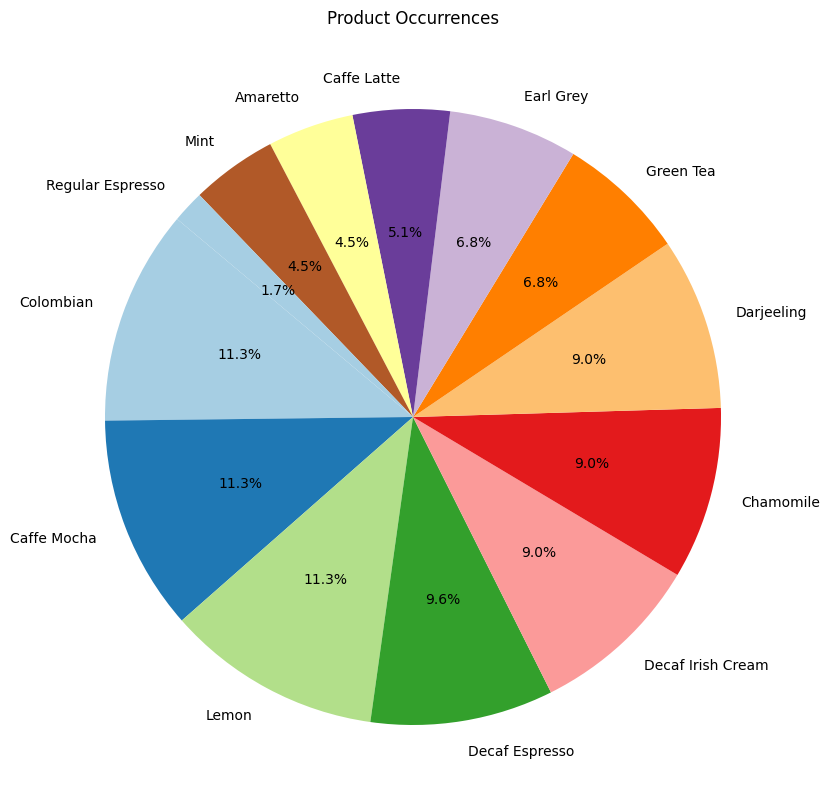

In [15]:
# Create a pie chart
plt.figure(figsize=(10, 10))
product_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Product Occurrences')
plt.ylabel('')  # Hide the y-label
plt.show()


# product_line_counts

In [16]:
product_line_counts = df['Product Line'].value_counts()
product_line_counts

Product Line
Beans     2232
Leaves    2016
Name: count, dtype: int64

# Number of Occurrences of Each Product by State

In [17]:
# Create a bar chart for the state-product counts
state_product_counts.plot(kind='bar', stacked=True, figsize=(20, 10), color=plt.cm.Paired.colors)

plt.title('Number of Occurrences of Each Product by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Product')
plt.grid(axis='y')

# Show the plot
plt.show()

NameError: name 'state_product_counts' is not defined

# state_product_counts

In [ ]:
# Count the number of occurrences of each product within each state
state_product_counts = df.groupby(['State', 'Product']).size().unstack(fill_value=0)
state_product_counts


# The most famous product

In [ ]:
# Count the number of occurrences of each product
product_counts = df['Product'].value_counts()

# Identify the most famous product
most_famous_product = product_counts.idxmax()
most_famous_count = product_counts.max()

print(f"The most famous product is '{most_famous_product}' with {most_famous_count} occurrences.")


# market_type_counts

In [ ]:
# Assuming 'Market' is the market type column
market_type_counts = df['Market'].value_counts()
print(market_type_counts)

# pie chart (Distribution of Market Types)

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_type_counts, labels=market_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Market Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

# The most profitable state with product type 

In [ ]:
# Convert dictionary to pandas DataFrame
df = pd.DataFrame(df)

# Calculate total profit for each state and product type combination
state_product_profit = df.groupby(['State', 'Product Type'])['Profit'].sum().reset_index()

# Find the most profitable state and product type combination
most_profitable = state_product_profit.loc[state_product_profit['Profit'].idxmax()]

print("The most profitable state with product type is:")
print(f"State: {most_profitable['State']}")
print(f"Product Type: {most_profitable['Product Type']}")
print(f"Total Profit: {most_profitable['Profit']}")

# Top 5 products based on profit-to-sales ratio

In [ ]:
# Calculate profit-to-sales ratio for each product
df['Profit-to-Sales Ratio'] = df['Profit'] / df['Sales']

# Sort the DataFrame by profit-to-sales ratio in descending order and select top 5
top_products = df.sort_values(by='Profit-to-Sales Ratio', ascending=False).head(5)

# Display the top 5 products
print("Top 5 products based on profit-to-sales ratio:")
top_products[['Product', 'Profit', 'Sales', 'Profit-to-Sales Ratio']]